In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from astropy.utils.data import get_pkg_data_filename
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning) 
from fermipy.gtanalysis import GTAnalysis
from astropy.io import fits
from astropy.wcs import WCS

In [2]:
c = np.load('Crab_5_bin_13/fit0.npy', allow_pickle=True).flat[0]

In [3]:
gta = GTAnalysis('new_data/config_5_13.yaml',logging={'verbosity': 3},fileio={'outdir': 'Crab_5_bin_13'})
gta.load_roi('fit0')

2022-02-15 23:38:24 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2022-02-15 23:38:24 INFO    GTAnalysis.load_roi(): Loading ROI file: /home/user/fermi/Crab_nebula/Crab_nebula_Analysis/Crab_5_bin_13/fit0.npy
2022-02-15 23:38:24 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2022-02-15 23:39:20 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [4]:
gta.print_roi()

2022-02-15 23:39:20 INFO    GTAnalysis.print_roi(): 
name                SpatialModel   SpectrumType     offset        ts       npred
--------------------------------------------------------------------------------
4FGL J0534.5+2200   PointSource    PLSuperExpCuto    0.003  97913.28    370644.4
4FGL J0534.5+2201s  PointSource    PowerLaw          0.005   9628.59     66670.9
4FGL J0534.5+2201i  RadialGaussian LogParabola       0.006  18066.54     94347.4
4FGL J0526.3+2246   PointSource    PowerLaw          2.037     82.99      1735.6
4FGL J0544.4+2238   PointSource    PowerLaw          2.375     34.65      1032.4
isodiff             ConstantValue  FileFunction      -----    882.92     35681.7
galdiff             MapCubeFunctio PowerLaw          -----  81050.07    192987.4



In [5]:
gta.print_params()

2022-02-15 23:39:20 INFO    GTAnalysis.print_params(): 
 idx parname                  value     error       min       max     scale free
--------------------------------------------------------------------------------
4FGL J0526.3+2246
   0 Prefactor                 1.75     0.245     1e-05     1e+03     1e-14    *
   1 Index                     2.46         0         0         5        -1     
   2 Scale                  4.4e+03         0   4.4e+03   4.4e+03         1     
4FGL J0534.5+2200
   3 Prefactor                 1.39    0.0499     1e-05     1e+03     1e-10    *
   4 Index1                    1.86         0         0         5        -1     
   5 Scale                 1.46e+03         0  1.46e+03  1.46e+03         1     
   6 Expfactor                0.467         0      -0.5       0.5      0.01     
   7 Index2                   0.667         0         0         2         1     
4FGL J0534.5+2201i
   8 norm                      0.67    0.0233     1e-05     1e+03     1e-12    

4FGL J0526.3+2246

In [6]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])
print(len(dnde))
print(len(E))

50
50


In [7]:
E = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0526.3+2246']['model_flux']['dnde'])

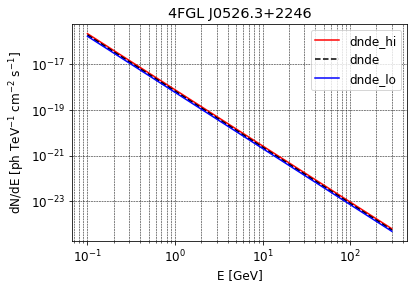

In [8]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [9]:
sed2246 = gta.sed('4FGL J0526.3+2246')

2022-02-15 23:39:21 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0526.3+2246
2022-02-15 23:39:45 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-15 23:39:45 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-15 23:40:19 INFO    GTAnalysis.sed(): Finished SED
2022-02-15 23:40:28 INFO    GTAnalysis.sed(): Execution time: 67.30 s


In [10]:
src = gta.roi['4FGL J0526.3+2246']

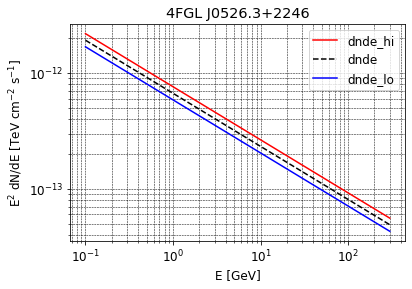

In [11]:

plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

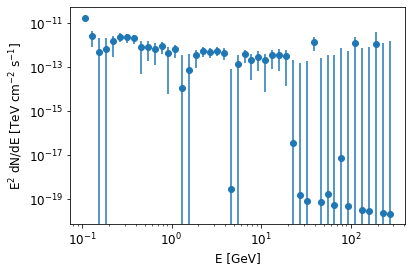

In [12]:
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

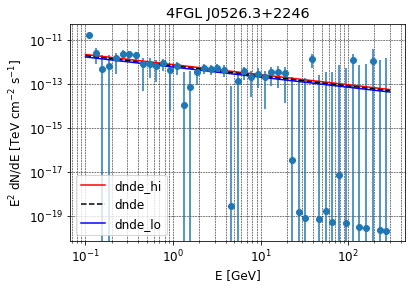

In [13]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2246['e_ctr']*1e-3),
             sed2246['e2dnde']*1e-6, 
             yerr=sed2246['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0526.3+2246')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2200

In [14]:
E = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2200']['model_flux']['dnde'])


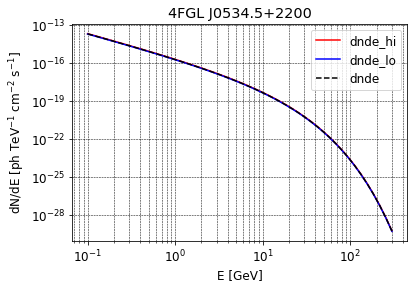

In [15]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')

plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [16]:
sed2200 = gta.sed('4FGL J0534.5+2200')

2022-02-15 23:40:31 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2200
2022-02-15 23:41:10 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-15 23:41:10 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-15 23:41:45 INFO    GTAnalysis.sed(): Finished SED
2022-02-15 23:41:53 INFO    GTAnalysis.sed(): Execution time: 82.67 s


In [17]:
src2200 = gta.roi['4FGL J0534.5+2200']

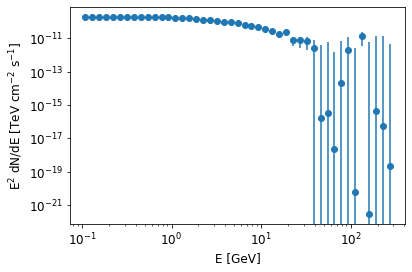

In [18]:
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

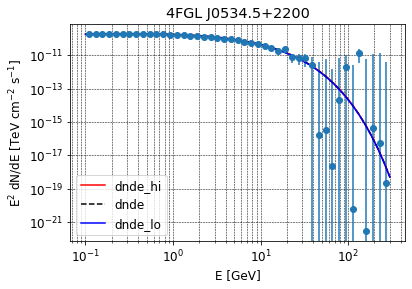

In [19]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2200['e_ctr']*1e-3),
             sed2200['e2dnde']*1e-6, 
             yerr=sed2200['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2200')
plt.legend(loc='lower left')
plt.show()

4FGL J0534.5+2201i

In [20]:
E = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201i']['model_flux']['dnde'])


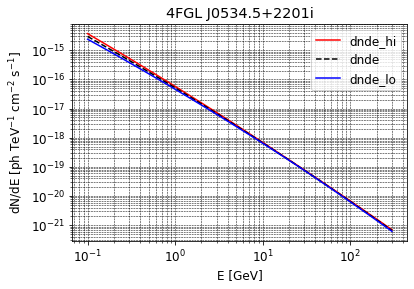

In [21]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [22]:
sed2201i = gta.sed('4FGL J0534.5+2201i')

2022-02-15 23:41:55 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201i
2022-02-15 23:42:11 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-15 23:42:11 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
/home/user/miniconda3/envs/fermi/lib/python3.7/site-packages/scipy/interpolate/fitpack2.py:279: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
2022-02-15 23:42:46 INFO    GTAnalysis.sed(): Finished SED
2022-02-15 23:42:54 INFO    GTAnalysis.sed(): Execution time: 58.89 s


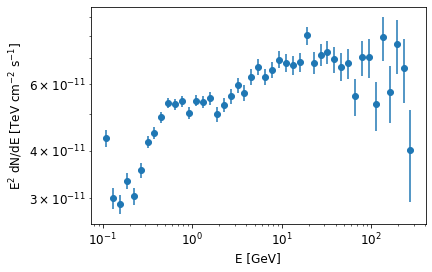

In [23]:
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

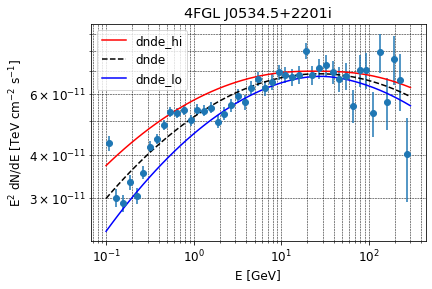

In [24]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201i['e_ctr']*1e-3),
             sed2201i['e2dnde']*1e-6, 
             yerr=sed2201i['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201i')
plt.legend(loc='upper left')
plt.show()

4FGL J0534.5+2201s

In [25]:
E = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0534.5+2201s']['model_flux']['dnde'])


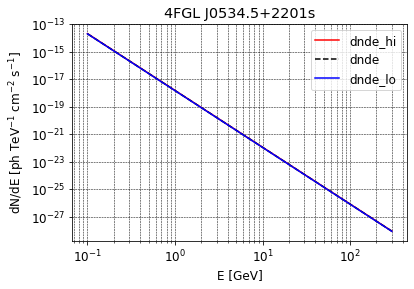

In [26]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [27]:
sed2201s = gta.sed('4FGL J0534.5+2201s')

2022-02-15 23:42:56 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0534.5+2201s
2022-02-15 23:43:23 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-15 23:43:23 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-15 23:43:59 INFO    GTAnalysis.sed(): Finished SED
2022-02-15 23:44:07 INFO    GTAnalysis.sed(): Execution time: 70.17 s


In [28]:
np.array(sed2201s['e_ctr']*1e-3)

array([1.09303734e-01, 1.30588520e-01, 1.56018105e-01, 1.86399610e-01,
       2.22697325e-01, 2.66063316e-01, 3.17873995e-01, 3.79769428e-01,
       4.53716946e-01, 5.42069535e-01, 6.47627080e-01, 7.73739912e-01,
       9.24410777e-01, 1.10442187e+00, 1.31948665e+00, 1.57643112e+00,
       1.88341056e+00, 2.25016829e+00, 2.68834499e+00, 3.21184812e+00,
       3.83729334e+00, 4.58453191e+00, 5.47728072e+00, 6.54379974e+00,
       7.81798801e+00, 9.34038978e+00, 1.11592498e+01, 1.33322976e+01,
       1.59285044e+01, 1.90302722e+01, 2.27360492e+01, 2.71634545e+01,
       3.24530112e+01, 3.87726067e+01, 4.63228211e+01, 5.53432934e+01,
       6.61203281e+01, 7.89959816e+01, 9.43789193e+01, 1.12756088e+02,
       1.34711602e+02, 1.60944078e+02, 1.92284820e+02, 2.29728565e+02,
       2.74463755e+02])

In [29]:
sed2201s['e2dnde']*1e-6

array([1.60518747e-10, 1.05585502e-10, 6.82289509e-11, 4.62864802e-11,
       2.49185763e-11, 1.66024173e-11, 1.38487592e-11, 9.15343146e-12,
       8.40321136e-12, 8.71287246e-12, 5.12767676e-12, 3.49936407e-12,
       4.58987614e-17, 5.71544772e-16, 2.85847253e-16, 4.48561374e-16,
       2.17209109e-18, 1.42513810e-18, 2.45814343e-18, 1.68205343e-18,
       2.22919560e-19, 6.79832491e-19, 1.98005967e-12, 6.81829348e-21,
       3.21991609e-16, 3.37951236e-12, 2.01164844e-12, 1.82982644e-15,
       6.57758960e-15, 2.89590814e-12, 2.10403442e-15, 5.59360503e-15,
       4.95248793e-15, 1.28159202e-15, 4.12211653e-17, 3.20304549e-16,
       1.17754070e-23, 2.65698772e-16, 9.95824470e-17, 2.96644368e-24,
       2.89994863e-17, 1.00467567e-18, 1.55242343e-18, 7.82319947e-19,
       1.95205708e-19])

In [30]:
sed2201s['e2dnde_err']*1e-6

array([2.22062247e-12, 1.88560371e-12, 1.72878697e-12, 1.62345541e-12,
       1.55772456e-12, 1.54849655e-12, 1.55404498e-12, 1.56827950e-12,
       1.60218705e-12, 1.64989136e-12, 1.70276051e-12, 1.76310559e-12,
       6.31389058e-13, 1.51725354e-12, 6.85576091e-13, 6.99199340e-13,
       2.66123841e-13, 3.61120994e-13, 5.25160260e-13, 1.03973481e-12,
       5.90292669e-13, 1.95851567e-12, 3.15415322e-12, 1.58245370e-12,
       3.06695919e-12, 3.58471179e-12, 3.75386125e-12, 3.94601632e-12,
       4.15405777e-12, 4.40437132e-12, 4.65948738e-12, 4.87868111e-12,
       5.16187929e-12, 5.55097984e-12, 5.92396063e-12, 6.52065832e-12,
       2.00297216e-12, 7.83726853e-12, 8.46338172e-12, 3.35303408e-12,
       1.02473249e-11, 9.05408495e-12, 1.26743859e-11, 1.28539489e-11,
       4.37040951e-12])

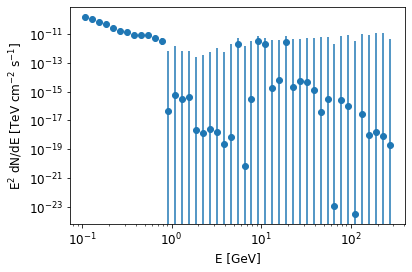

In [31]:
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             np.array(sed2201s['e2dnde']*1e-6), 
             yerr=np.array(sed2201s['e2dnde_err']*1e-6), fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

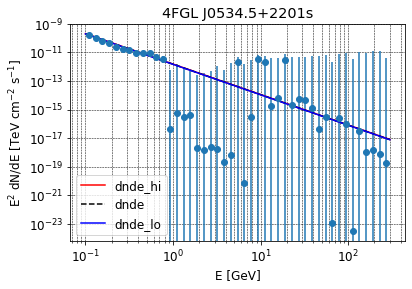

In [32]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2201s['e_ctr']*1e-3),
             sed2201s['e2dnde']*1e-6, 
             yerr=sed2201s['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0534.5+2201s')
plt.legend(loc='lower left')
plt.show()

4FGL J0544.4+2238

In [33]:
E = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['energies'])

dnde_hi = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_hi'])
dnde_lo = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde_lo'])
dnde = np.array(c['sources']['4FGL J0544.4+2238']['model_flux']['dnde'])


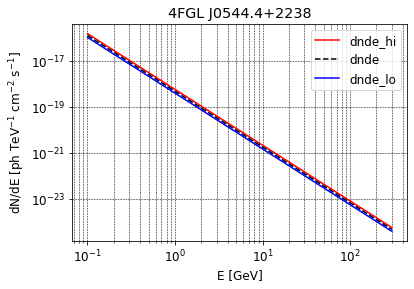

In [34]:

plt.loglog(E/1e3, dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'dN/dE [ph TeV$^{-1}$ cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='upper right')
plt.show()
#plt.savefig("Crab_5/J0534.5+2200_spectrum.png")

In [35]:
sed2238 = gta.sed('4FGL J0544.4+2238')

2022-02-15 23:44:08 INFO    GTAnalysis.sed(): Computing SED for 4FGL J0544.4+2238
2022-02-15 23:44:18 INFO    GTAnalysis._make_sed(): Fitting SED
2022-02-15 23:44:18 INFO    GTAnalysis.free_source(): Fixing parameters for 4FGL J0534.5+2201i    : ['alpha', 'beta']
2022-02-15 23:44:52 INFO    GTAnalysis.sed(): Finished SED
2022-02-15 23:45:00 INFO    GTAnalysis.sed(): Execution time: 51.82 s


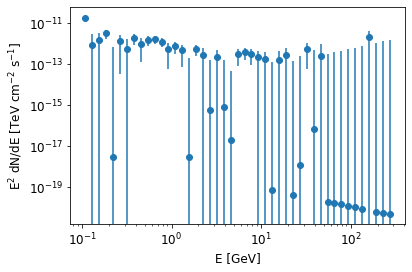

In [36]:
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^{2}$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.show()

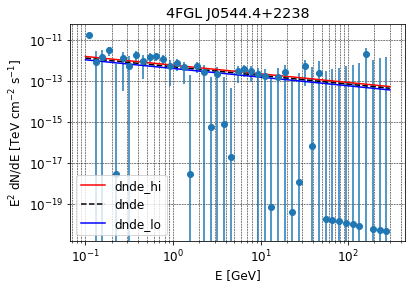

In [37]:
plt.loglog(E/1e3, (E**2)*dnde_hi*1e-6, 'r', label='dnde_hi')
plt.loglog(E/1e3, (E**2)*dnde*1e-6, 'k--',label ='dnde')
plt.loglog(E/1e3, (E**2)*dnde_lo*1e-6, 'blue',label ='dnde_lo')
plt.errorbar(np.array(sed2238['e_ctr']*1e-3),
             sed2238['e2dnde']*1e-6, 
             yerr=sed2238['e2dnde_err']*1e-6, fmt ='o')

plt.grid(True, which="both", ls="--",color='black',lw =0.5)
plt.xlabel('E [GeV]')
plt.ylabel(r'E$^2$ dN/dE [TeV cm$^{-2}$ s$^{-1}$]')
plt.title('4FGL J0544.4+2238')
plt.legend(loc='lower left')
plt.show()